## Michał Urbaniak, 245954, Eksploracyjna Analiza Danych

### Źródła danych:
https://bdl.stat.gov.pl
### Opis danych:
W moim projekcie działam na dwóch plikach. Pierwszy z nich - IMPREZY.xlsx - zawiera dane dotyczące imprez masowych w zależności od województwa. Drugi z plików - WIEK.xlsx - zawiera informacje o medianie wieku w każdym z województw.
### Cel analizy:
Celem analizy jest zbadanie zależności między strukturą wiekową populacji (wyrażoną przez medianę wieku) a aktywnością kulturalną, przyjmowaną jako liczba imprez masowych w roku 2023. Analiza ma na celu określenie, czy województwa o innej strukturze wiekowej charakteryzują się różną liczbą imprez masowych.

Podgląd danych KULT:


,Nazwa,Wartosc
0,MAŁOPOLSKIE,2037289
1,ŚLĄSKIE,4622346
2,LUBUSKIE,525070
3,WIELKOPOLSKIE,2376293
4,ZACHODNIOPOMORSKIE,1230115


Agregacja imprez masowych według nazw województw:


,Nazwa,total_events
0,DOLNOŚLĄSKIE,2603236
1,KUJAWSKO-POMORSKIE,1436450
2,LUBELSKIE,908626
3,LUBUSKIE,525070
4,MAZOWIECKIE,4502016


Podgląd danych demograficznych:


,Kod,Nazwa,Płeć,Rok,Wartosc,Jednostka miary,Atrybut
0,200000,DOLNOŚLĄSKIE,ogółem,2023,43.2,-,
1,400000,KUJAWSKO-POMORSKIE,ogółem,2023,43.2,-,
2,600000,LUBELSKIE,ogółem,2023,43.5,-,
3,800000,LUBUSKIE,ogółem,2023,43.3,-,
4,1000000,ŁÓDZKIE,ogółem,2023,44.6,-,


Dane demograficzne z kolumną 'median_age':


,Nazwa,median_age
0,DOLNOŚLĄSKIE,43.2
1,KUJAWSKO-POMORSKIE,43.2
2,LUBELSKIE,43.5
3,LUBUSKIE,43.3
4,ŁÓDZKIE,44.6


Połączone dane:


,Nazwa,total_events,median_age
0,DOLNOŚLĄSKIE,2603236,43.2
1,KUJAWSKO-POMORSKIE,1436450,43.2
2,LUBELSKIE,908626,43.5
3,LUBUSKIE,525070,43.3
4,MAZOWIECKIE,4502016,41.7


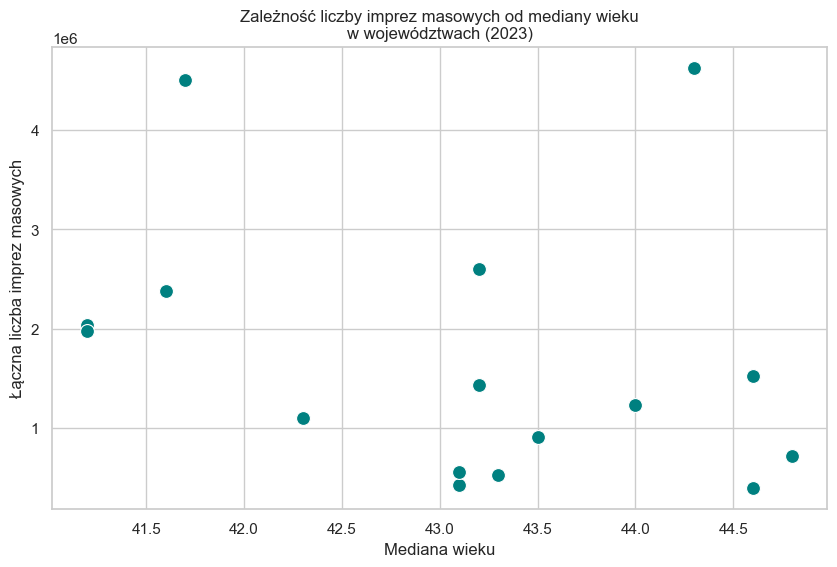

In [4]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

sns.set(style="whitegrid")
%matplotlib inline

kult_df = pd.read_excel("dane/IMPREZY.xlsx", sheet_name="DANE")

cols_to_drop_kult = ['Imprezy', 'Uczestnicy imprez', 'Rok', 'Jednostka miary', 'Atrybut','Kod']
kult_df = kult_df.drop(columns=cols_to_drop_kult, errors='ignore')

print("Podgląd danych KULT:")
display(kult_df.head())

events_df = kult_df.groupby('Nazwa', as_index=False)['Wartosc'].sum()
events_df.rename(columns={'Wartosc': 'total_events'}, inplace=True)

print("Agregacja imprez masowych według nazw województw:")
display(events_df.head())

pop_df = pd.read_excel("dane/WIEK.xlsx", sheet_name="DANE")

print("Podgląd danych demograficznych:")
display(pop_df.head())

pop_df = pop_df.rename(columns={'Wartosc': 'median_age'})
cols_to_drop_pop = ['Płeć', 'Rok', 'Jednostka miary', 'Atrybut','Kod']
pop_df = pop_df.drop(columns=cols_to_drop_pop, errors='ignore')

print("Dane demograficzne z kolumną 'median_age':")
display(pop_df.head())

merged_df = pd.merge(events_df, pop_df, on='Nazwa', how='inner')

print("Połączone dane:")
display(merged_df.head())

plt.figure(figsize=(10,6))
sns.scatterplot(data=merged_df, x='median_age', y='total_events', s=100, color='teal')
plt.title("Zależność liczby imprez masowych od mediany wieku\nw województwach (2023)")
plt.xlabel("Mediana wieku")
plt.ylabel("Łączna liczba imprez masowych")
plt.show()

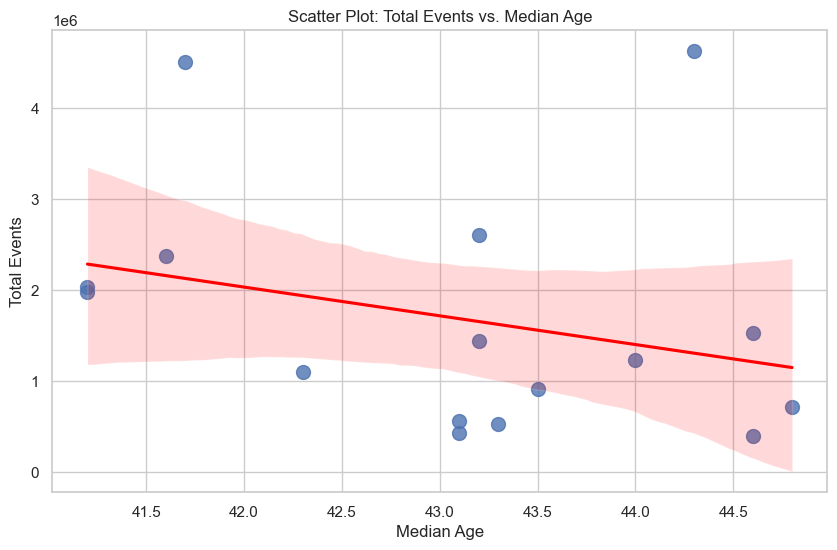

In [5]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import scipy.stats as stats

sns.set(style="whitegrid")
##############################################
# Chart 1: Scatter Plot z linią regresji
##############################################
plt.figure(figsize=(10,6))
sns.regplot(data=merged_df, x='median_age', y='total_events', 
            scatter_kws={'s':100}, line_kws={'color':'red'})
plt.title("Scatter Plot: Total Events vs. Median Age")
plt.xlabel("Median Age")
plt.ylabel("Total Events")
plt.show()


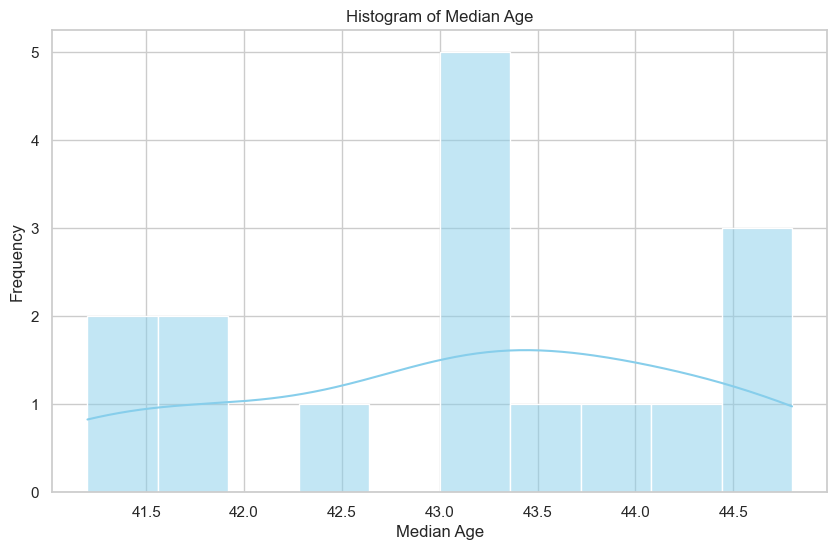

In [6]:
##############################################
# Chart 2: Histogram rozkładu mediany wieku
##############################################
plt.figure(figsize=(10,6))
sns.histplot(merged_df['median_age'], kde=True, bins=10, color='skyblue')
plt.title("Histogram of Median Age")
plt.xlabel("Median Age")
plt.ylabel("Frequency")
plt.show()

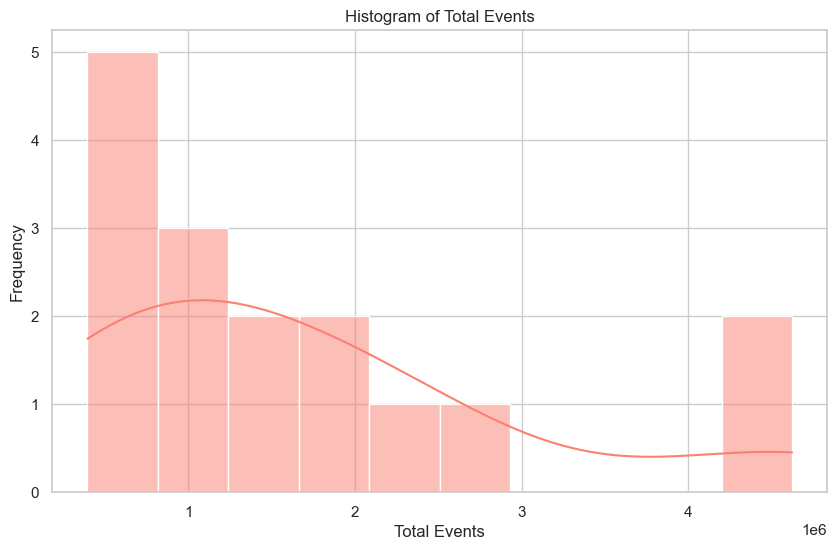

In [7]:
##############################################
# Chart 3: Histogram rozkładu liczby imprez masowych
##############################################
plt.figure(figsize=(10,6))
sns.histplot(merged_df['total_events'], kde=True, bins=10, color='salmon')
plt.title("Histogram of Total Events")
plt.xlabel("Total Events")
plt.ylabel("Frequency")
plt.show()

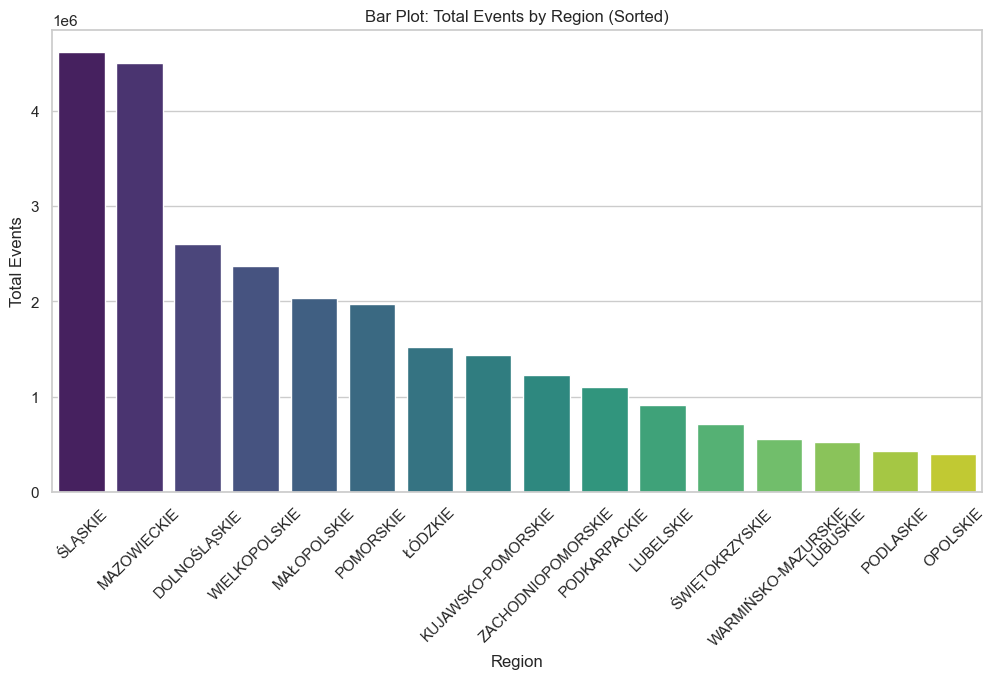

In [8]:
##############################################
# Chart 4: Bar Plot uporządkowany według liczby imprez
##############################################
sorted_df = merged_df.sort_values('total_events', ascending=False)

plt.figure(figsize=(12,6))
sns.barplot(data=sorted_df, x='Nazwa', y='total_events', hue='Nazwa', dodge=False, palette='viridis', legend=False)
plt.xticks(rotation=45)
plt.title("Bar Plot: Total Events by Region (Sorted)")
plt.xlabel("Region")
plt.ylabel("Total Events")
plt.show()

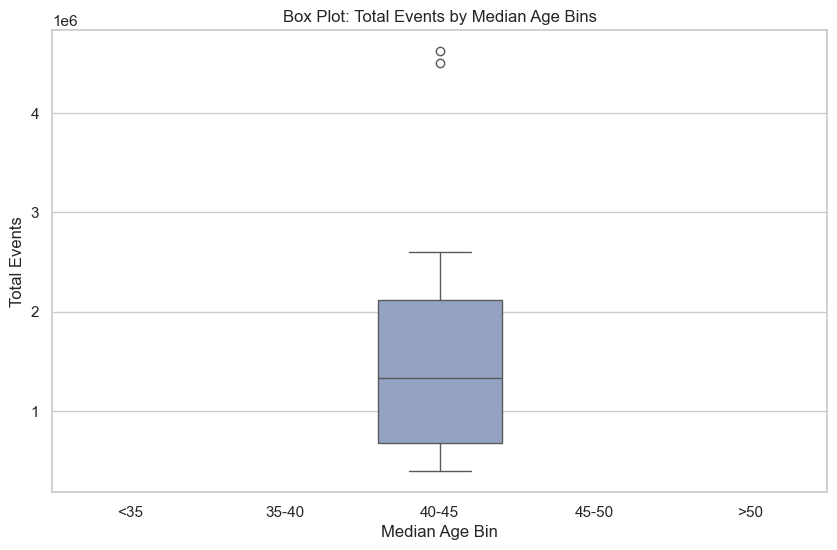

In [9]:
##############################################
# Chart 5: Box Plot: Total Events według binów mediany wieku
##############################################
merged_df['age_bin'] = pd.cut(merged_df['median_age'], bins=[0,35,40,45,50,100],
                              labels=["<35", "35-40", "40-45", "45-50", ">50"])

plt.figure(figsize=(10,6))
sns.boxplot(data=merged_df, x='age_bin', y='total_events', hue='age_bin', 
            dodge=False, palette='Set2')
plt.title("Box Plot: Total Events by Median Age Bins")
plt.xlabel("Median Age Bin")
plt.ylabel("Total Events")
plt.legend([],[], frameon=False)
plt.show()


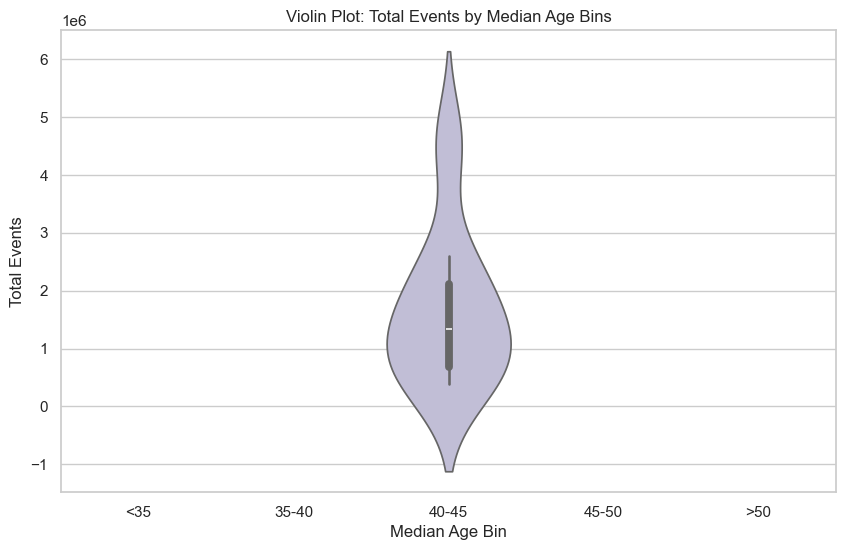

In [10]:
##############################################
# Chart 6: Violin Plot: Total Events według binów mediany wieku
##############################################
plt.figure(figsize=(10,6))
sns.violinplot(data=merged_df, x='age_bin', y='total_events', hue='age_bin', 
               dodge=False, palette='Set3')
plt.title("Violin Plot: Total Events by Median Age Bins")
plt.xlabel("Median Age Bin")
plt.ylabel("Total Events")
plt.legend([],[], frameon=False)
plt.show()


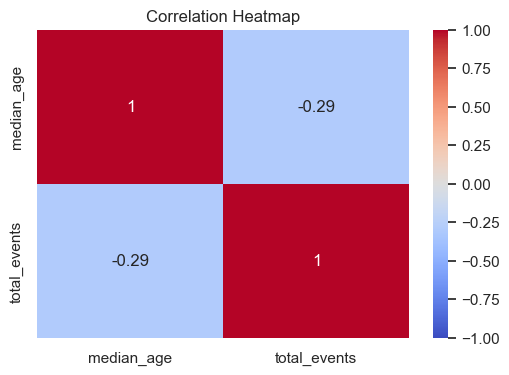

In [11]:
##############################################
# Chart 7: Heatmap korelacji między medianą wieku a liczbą imprez
##############################################
corr = merged_df[['median_age', 'total_events']].corr()
plt.figure(figsize=(6,4))
sns.heatmap(corr, annot=True, cmap='coolwarm', vmin=-1, vmax=1)
plt.title("Correlation Heatmap")
plt.show()

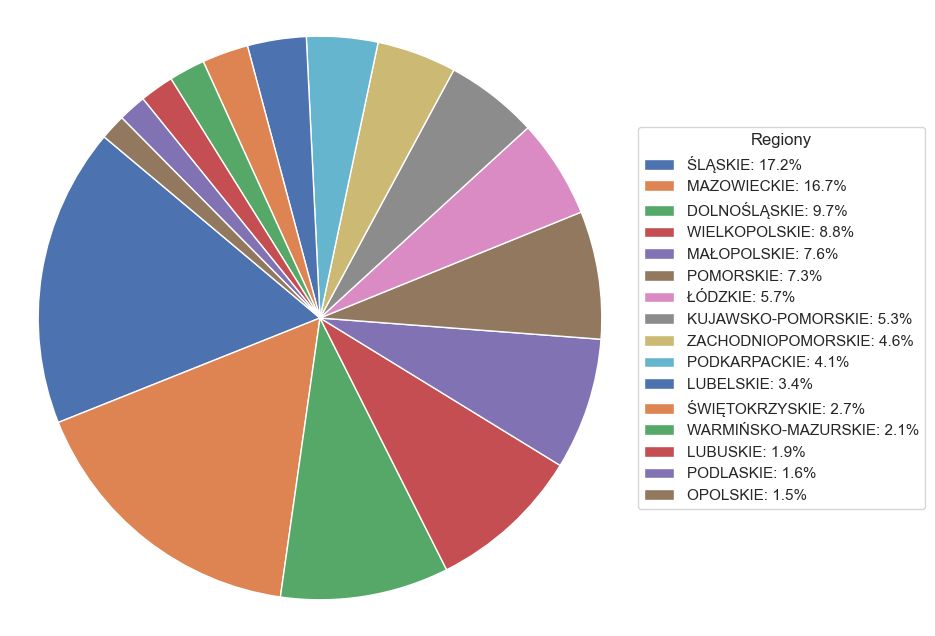

In [12]:
##############################################
# Chart 8: Pie Chart – udział poszczególnych regionów w łącznej liczbie imprez
##############################################
percentages = sorted_df['total_events'] / sorted_df['total_events'].sum() * 100
fig, ax = plt.subplots(figsize=(8,8))
wedges, texts = ax.pie(sorted_df['total_events'], startangle=140)
ax.axis('equal')
legend_labels = [f"{name}: {pct:.1f}%" for name, pct in zip(sorted_df['Nazwa'], percentages)]
ax.legend(wedges, legend_labels, title="Regiony", loc="center left", bbox_to_anchor=(1, 0, 0.5, 1))
plt.show()


### Wnioski

1. **Zróżnicowanie danych:**  
   - Województwa różnią się pod względem mediany wieku oraz liczby organizowanych imprez masowych.  
   - Struktura wiekowa populacji nie jest jednolita w całym kraju.

2. **Zależność między medianą wieku a liczbą imprez:**  
   - Nie ma wyraźnej zależności między medianą wieku a liczbą imprez masowych.  
   - Wykresy pokazują pewne różnice między grupami wiekowymi, ale trend nie jest jednoznaczny.

3. **Dominacja niektórych regionów:**  
   - Kilka województw organizuje znacznie więcej imprez niż inne.  
   - Może to wynikać z lepszej infrastruktury, większych funduszy lub specyfiki regionu.

4. **Dalsze analizy:**  
   - Inne czynniki, takie jak dochody, gęstość zaludnienia czy infrastruktura kulturalna, mogą mieć większy wpływ na liczbę imprez niż wiek populacji.  
   - Warto przeprowadzić szerszą analizę uwzględniającą dodatkowe zmienne.
